In [54]:
import pandas as pd
import os

# path
data_path = os.path.join("..", "data", "atus", "atus_data_processed.csv")

# Load the CSV
atus_df = pd.read_csv(data_path)

# Peek at the first rows
atus_df.head()

,YEAR,CASEID,SERIAL,STRATA,PERNUM,LINENO,WT06,WT20,AGE,SEX,RELATE,AGE_CPS8,SEX_CPS8,time_online
0,2003,20030100013280,1,600.0,1,1,8.155463e+06,NaN,60,1,10,60,1,325
1,2003,20030100013344,2,600.0,1,1,1.735323e+06,NaN,41,2,10,41,2,60
2,2003,20030100013352,3,600.0,1,1,3.830527e+06,NaN,26,2,10,25,2,120
3,2003,20030100013848,4,1302.0,1,1,6.622023e+06,NaN,36,2,10,36,2,265
4,2003,20030100014165,5,2103.0,1,1,3.068387e+06,NaN,51,1,10,50,1,60


## Inspect Data

In [56]:
atus_df.info()
atus_df.describe()
atus_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252808 entries, 0 to 252807
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         252808 non-null  int64  
 1   CASEID       252808 non-null  int64  
 2   SERIAL       252808 non-null  int64  
 3   STRATA       159937 non-null  float64
 4   PERNUM       252808 non-null  int64  
 5   LINENO       252808 non-null  int64  
 6   WT06         244026 non-null  float64
 7   WT20         18217 non-null   float64
 8   AGE          252808 non-null  int64  
 9   SEX          252808 non-null  int64  
 10  RELATE       252808 non-null  int64  
 11  AGE_CPS8     252808 non-null  int64  
 12  SEX_CPS8     252808 non-null  int64  
 13  time_online  252808 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 27.0 MB


YEAR                0
CASEID              0
SERIAL              0
STRATA          92871
PERNUM              0
LINENO              0
WT06             8782
WT20           234591
AGE                 0
SEX                 0
RELATE              0
AGE_CPS8            0
SEX_CPS8            0
time_online         0
dtype: int64

## Drop WT20 Column

In [67]:
# Drop WT20 safely (ignores error if already dropped)
atus_df = atus_df.drop(columns=["WT20"], errors="ignore")

# Fill STRATA missing values with median
atus_df["STRATA"] = atus_df["STRATA"].fillna(atus_df["STRATA"].median())

# Fill WT06 missing values with median
atus_df["WT06"] = atus_df["WT06"].fillna(atus_df["WT06"].median())

## Remove trailing white spaces

In [70]:
# Strip whitespace only from string columns
atus_df[atus_df.select_dtypes(include=["object"]).columns] = (
    atus_df.select_dtypes(include=["object"]).map(lambda x: x.strip() if isinstance(x, str) else x)
)

In [71]:
atus_df["gender"] = atus_df["SEX"].map({1: "Male", 2: "Female"})

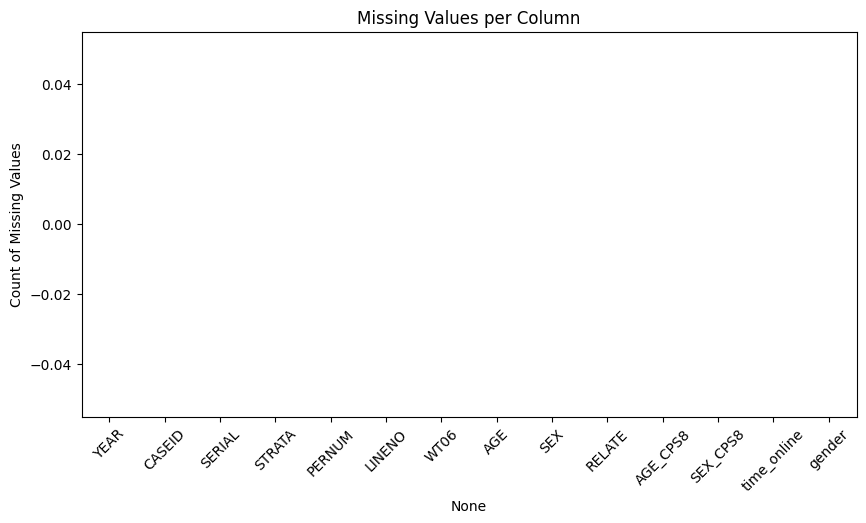

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_summary = atus_df.isna().sum()

plt.figure(figsize=(10,5))
sns.barplot(x=missing_summary.index, y=missing_summary.values)
plt.xticks(rotation=45)
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

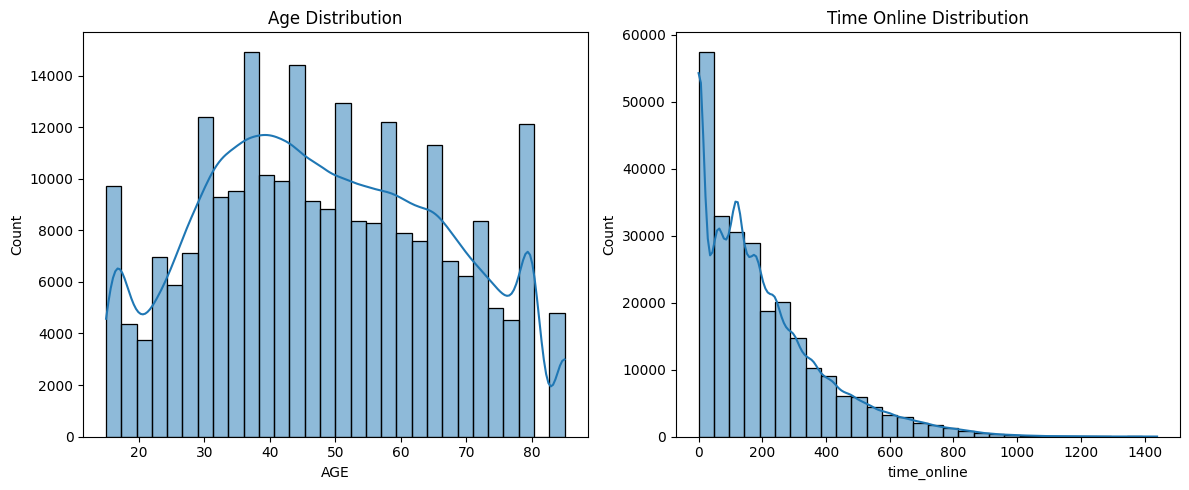

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(atus_df["AGE"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(atus_df["time_online"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Time Online Distribution")

plt.tight_layout()
plt.show()

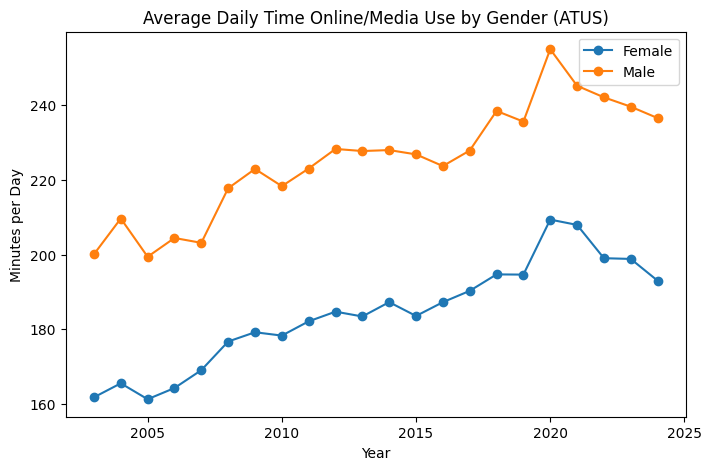

In [74]:
# Average minutes per day spent online/media activities by gender & year
avg_time = (
    atus_df.groupby(["YEAR", "gender"])["time_online"]
    .mean()
    .reset_index()
)

# visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for g in avg_time["gender"].unique():
    subset = avg_time[avg_time["gender"] == g]
    plt.plot(subset["YEAR"], subset["time_online"], marker="o", label=g)

plt.title("Average Daily Time Online/Media Use by Gender (ATUS)")
plt.xlabel("Year")
plt.ylabel("Minutes per Day")
plt.legend()
plt.show()